In [17]:
import pandas as pd
import numpy as np
import os
%matplotlib inline

In [5]:
np.arange('2009-01-01', '2019-01-01', dtype = 'datetime64[W]')

array(['2009-01-01', '2009-01-08', '2009-01-15', '2009-01-22',
       '2009-01-29', '2009-02-05', '2009-02-12', '2009-02-19',
       '2009-02-26', '2009-03-05', '2009-03-12', '2009-03-19',
       '2009-03-26', '2009-04-02', '2009-04-09', '2009-04-16',
       '2009-04-23', '2009-04-30', '2009-05-07', '2009-05-14',
       '2009-05-21', '2009-05-28', '2009-06-04', '2009-06-11',
       '2009-06-18', '2009-06-25', '2009-07-02', '2009-07-09',
       '2009-07-16', '2009-07-23', '2009-07-30', '2009-08-06',
       '2009-08-13', '2009-08-20', '2009-08-27', '2009-09-03',
       '2009-09-10', '2009-09-17', '2009-09-24', '2009-10-01',
       '2009-10-08', '2009-10-15', '2009-10-22', '2009-10-29',
       '2009-11-05', '2009-11-12', '2009-11-19', '2009-11-26',
       '2009-12-03', '2009-12-10', '2009-12-17', '2009-12-24',
       '2009-12-31', '2010-01-07', '2010-01-14', '2010-01-21',
       '2010-01-28', '2010-02-04', '2010-02-11', '2010-02-18',
       '2010-02-25', '2010-03-04', '2010-03-11', '2010-

In [6]:
# create the path for the file

myPath = os.path.join('/Users', 'Bryan', 'Documents', 'Programming', 'time_series_forecasting_with_python', 'UDEMY_TSA_FINAL', 'Data')

print(myPath)

os.chdir(myPath)

/Users/Bryan/Documents/Programming/time_series_forecasting_with_python/UDEMY_TSA_FINAL/Data


In [9]:
df = pd.read_csv('starbucks.csv', index_col = 'Date', parse_dates=True)

In [10]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [11]:
# daily --- > yeaarly
df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [12]:
def first_day(entry):
    
    # is there an entry
    if len(entry) != 0:
        # if so return first entry
        return entry[0]

In [13]:
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


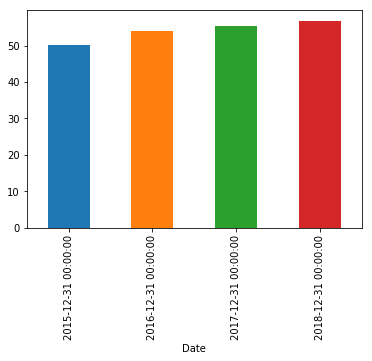

In [18]:
df['Close'].resample('A').mean().plot.bar();

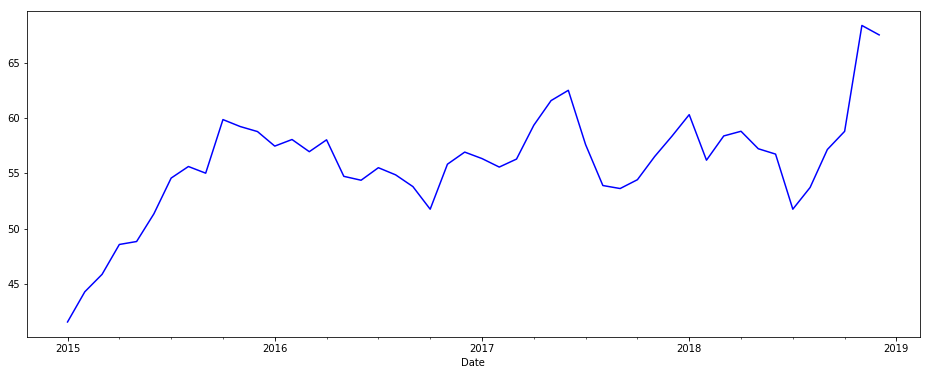

In [26]:
df['Close'].resample('M').max().plot.line(color = 'blue', figsize = (16,6));

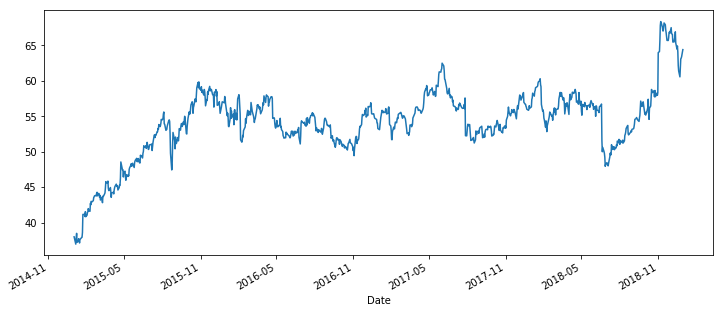

In [27]:
df['Close'].plot(figsize=(12,5))

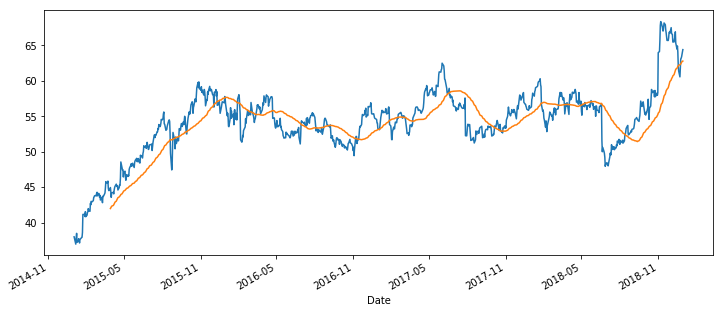

In [33]:
# add a seven day rolling mean
df['Close'].plot(figsize=(12,5))
df.rolling(window=60).mean()['Close'].plot()


In [34]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df.head()

,Close,Volume,Close: 30 Day Mean
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN
2015-01-07,37.8848,9732554,NaN
2015-01-08,38.4961,13170548,NaN


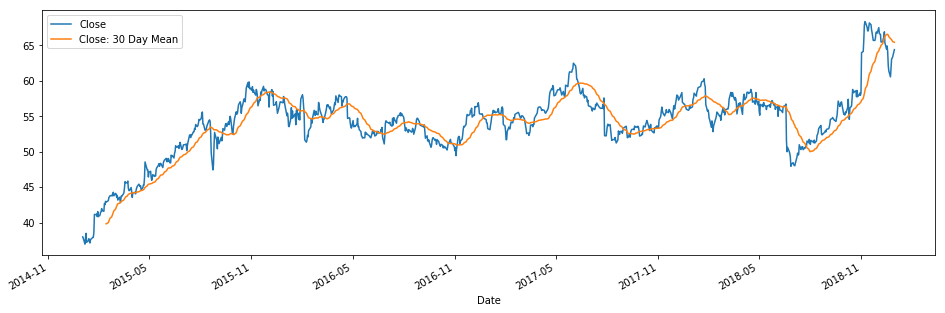

In [37]:
df[['Close', 'Close: 30 Day Mean']].plot(figsize=(16,5))

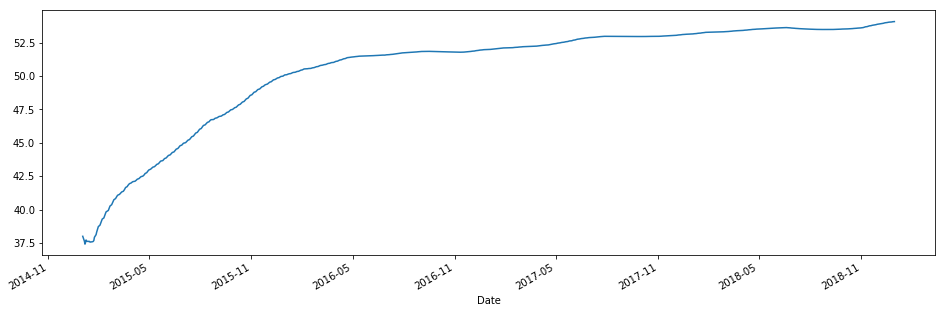

In [41]:
df['Close'].expanding().mean().plot(figsize=(16,5))

In [42]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

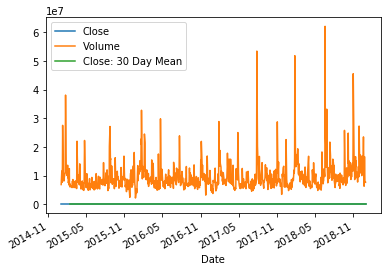

In [43]:
df.plot()

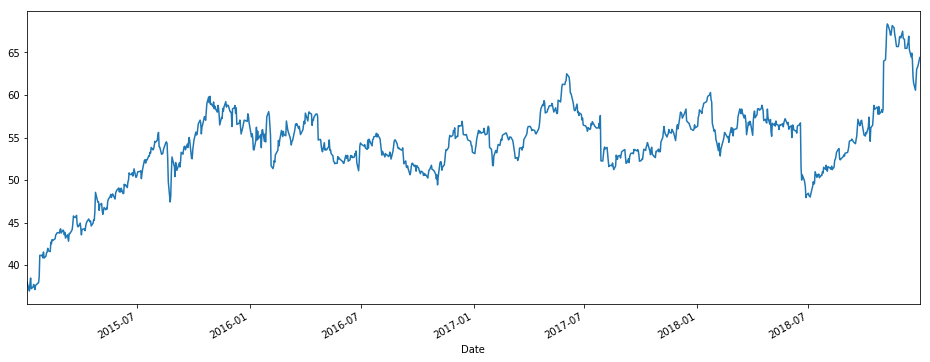

In [48]:
ax = df['Close'].plot(figsize=(16,6))
ax.autoscale(axis = 'x', tight = True)

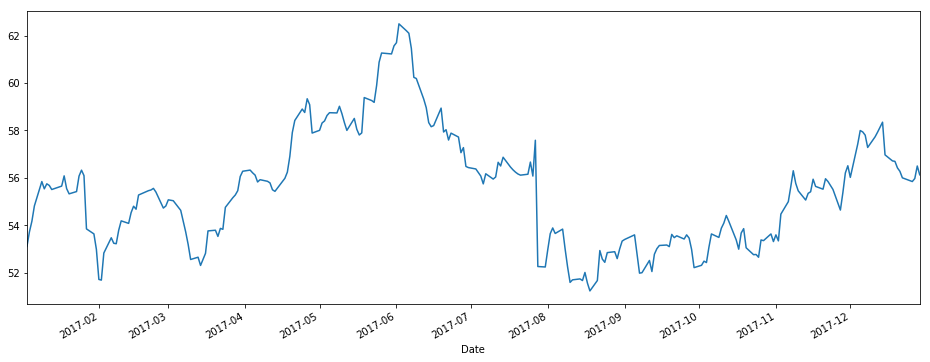

In [50]:
# can slice first
ax = df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(16,6))
ax.autoscale(axis = 'x', tight = True)

In [51]:
from matplotlib import dates

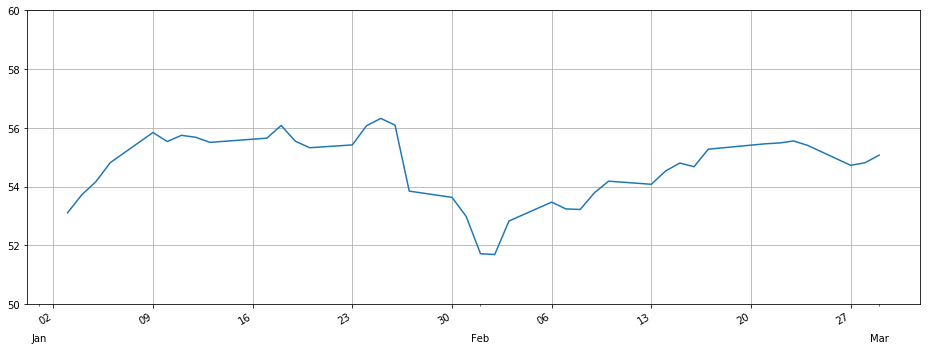

In [64]:
ax = df['Close']['2017-01-01':'2017-03-01'].plot(figsize=(16,6), ylim=[50,60])
ax.set(xlabel='')


ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))


ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))
ax.xaxis.set_minor_locator(dates.MonthLocator())

ax.yaxis.grid(True)
ax.xaxis.grid(True)